In [2]:
import torch
import tensorboard 
import os


In [ ]:
data_dir = "./train_curve_data/"
data_files = os.listdir(data_dir)

for file in data_files:
    print(file)

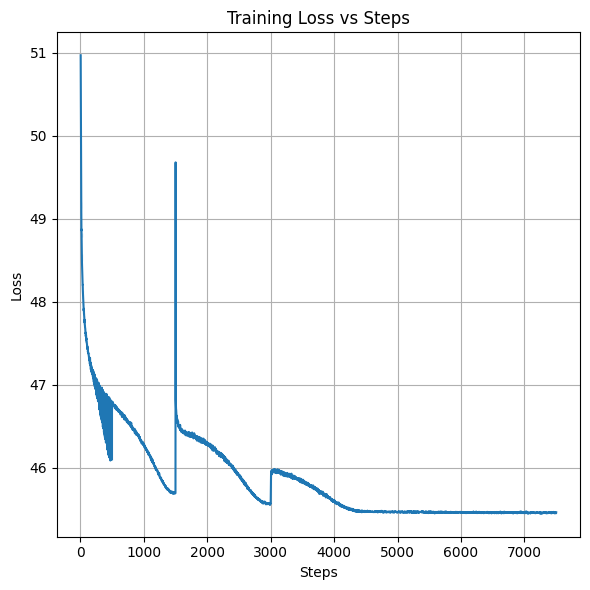

Total steps: 4000
Initial loss: 45.4680
Final loss: 46.7965


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Get all CSV files with resnet34 in the name
csv_files = glob.glob('train_curve_data/*resnet34*.csv')
csv_files = [f for f in csv_files if '(1)' in f]

# Function to extract learning rate from filename
def get_lr_from_filename(filename):
    parts = filename.split('_')
    lr_idx = parts.index('lr') + 1
    return float(parts[lr_idx])

# Sort files by learning rate
csv_files.sort(key=get_lr_from_filename, reverse=False)

# Initialize lists to store concatenated data
all_steps = []
all_losses = []
all_lrs = []
current_step_offset = 0
min_step = float('-inf')
max_step = float('-inf')

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    is_before = False
    # Check which column contains the loss data
    loss_col = 'loss' if 'loss' in df.columns else 'Value'
    
    # Sort by step
    df = df.sort_values('Step')
    # print(df.describe())
    
    # detect if the range of steps is overlapping 
    # . with the already covered range, if so drop
    # . whats overlapping
    if min_step == float('-inf'):
        # First file
        dfs.append(df)
        min_step = min(df['Step'])
        max_step = max(df['Step'])
    else:
        # Check overlap
        curr_min = min(df['Step'])
        curr_max = max(df['Step'])
        
        if curr_min > max_step:
            # No overlap, this data comes after
            dfs.append(df)
            max_step = curr_max
        elif curr_max < min_step:
            # No overlap, this data comes before
            dfs.insert(0, df)
            min_step = curr_min
        else:
            # There is overlap
            if curr_min < min_step:
                # Keep data before min_step
                dfs.insert(0, df[df['Step'] < min_step])
                min_step = curr_min
            if curr_max > max_step:
                # Keep data after max_step
                dfs.append(df[df['Step'] > max_step])
                max_step = curr_max
    # if min_step > max(df["Step"]) or max_step < min(df["Step"]):
    #    if (not np.isinf(min_step)) and (min_step > max(df["Step"])):
    #        is_before = True
    # else:
    #    if min_step > min(df["Step"]):
    #        # cut off top end
    #        df = df[df["Step"] < min_step]
    #        is_before = True
    #    if max_step < max(df["Step"]):
    #        # cut off bottom end
    #        df = df[df["Step"] > max_step] 
    # print(df.describe())
    # # dfs.append(df)
    #  # current_step_offset = max(all_steps) + 1
    # min_step = min(min_step, min(df['Step']))
    # max_step = max(max_step, max(df['Step']))
    
    # steps = df['Step'] + current_step_offset
    
    # Store data
    if is_before:
        all_steps = df['Step'].tolist() + all_steps
        all_losses = df[loss_col].tolist() + all_losses
    else:
        all_steps.extend(df['Step'].tolist())
        all_losses.extend(df[loss_col].tolist())

df_concat = pd.concat(dfs) 
df_concat = df_concat.sort_values('Step')

import seaborn as sns

# Create figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
# fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(6, 6))

# Plot loss
sns.lineplot(x='Step', y='Value', data=df_concat, ax=ax1)

# ax1.plot(all_steps, all_losses, label='Training Loss')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss vs Steps')
ax1.grid(True)

# Plot learning rate if available
# if len(all_lrs) > 0:
#     ax2.scatter(all_steps, all_lrs, label='Learning Rate')
#     ax2.set_xlabel('Steps')
#     ax2.set_ylabel('Learning Rate')
#     ax2.set_title('Learning Rate vs Steps')
#     ax2.grid(True)

plt.tight_layout()
plt.show()


# plt.show()
# Print some statistics
print(f"Total steps: {len(all_steps)}")
print(f"Initial loss: {all_losses[0]:.4f}")
print(f"Final loss: {all_losses[-1]:.4f}")

In [15]:
[df_.columns for df_ in dfs]

[Index(['Wall time', 'Step', 'Value'], dtype='object'),
 Index(['Wall time', 'Step', 'Value'], dtype='object'),
 Index(['Wall time', 'Step', 'Value'], dtype='object'),
 Index(['Wall time', 'Step', 'Value'], dtype='object'),
 Index(['Wall time', 'Step', 'Value'], dtype='object')]

In [5]:
file, df aa

('train_curve_data/SimCLR_cifar100_resnet34_lr_0.0002_decay_0.0001_bsz_2048_temp_0.5_trial_0_cosine_warm.csv',
         Wall time  Step      Value
 0    1.733053e+09  4506  45.468014
 1    1.733053e+09  4507  45.467403
 2    1.733053e+09  4512  45.469574
 3    1.733053e+09  4515  45.468151
 4    1.733053e+09  4516  45.477741
 ..            ...   ...        ...
 995  1.733120e+09  7480  45.457317
 996  1.733121e+09  7489  45.452698
 997  1.733121e+09  7495  45.457699
 998  1.733121e+09  7499  45.452686
 999  1.733121e+09  7500  45.464085
 
 [1000 rows x 3 columns])